# Singular Value Decomposition

## Introduction

In this chapter we will look at singular value decomposition and its applications to data science problems.


## Matrix Transpose

We will denote the transpose of the matrix $A$ by $A^T$, i.e. $A^T$ is $A$ with rows and columns switched. Example:
$$
  A = \begin{pmatrix}
1 & 2\\
3 & 4
\end{pmatrix}, \ A^T = \begin{pmatrix}
1 & 3\\
2 & 4
\end{pmatrix}
$$

A matrix is called square if it has the same number of rows and columns.

## Eigenvalues

A complex number $\lambda$ is called an **eigenvalue** of an $n$ by $n$ square matrix $A$ if there exists an $n$ dimensional non-zero column vector $u \in \mathbb{R}^n$ such that
$$
  Au = \lambda u.
$$

The vector $u$ is then called an **eigenvector**. Eigenvectors corresponding to the same eigenvalue form a linear subspace of $\mathbb{R}^n.$

Note that, as usual, when we say "vector" we mean "column vector".

## Eigenvalues

Eigenvalues of $A$ are in one to one correspondence with the roots of the polynomial
$$
  P(\lambda) = \det(A-\lambda I),
$$
where $I$ is the identity matrix.

## Eigenvalues

For example, in order to find the eigenvalues of
$$
\begin{pmatrix}
1 & 2\\
3 & 4
\end{pmatrix}
$$
we can solve the following equation
$$
\det \begin{pmatrix}
1-\lambda & 2\\
3 & 4-\lambda
\end{pmatrix} = \lambda^2-5\lambda-2=0.
$$
Solutions are 
$\frac{5+\sqrt{33}}{2}\approx5.37,$ $\frac{5-\sqrt{33}}{2}\approx-0.37$.

## Eigenvalues

We can also find eigenvalues of a matrix using python's `numpy` package:

In [1]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
eigenvalues = np.linalg.eigvals(A)
print(f"Matrix A:")
print(A)
print(f"Eigenvalues of A: {eigenvalues}")

Matrix A:
[[1 2]
 [3 4]]
Eigenvalues of A: [-0.37228132  5.37228132]


## Singular Value Decomposition

Every real $n$ by $m$ matrix $A$ has a (non-unique) **Singular Value Decomposition** (SVD):
$$
  A = U M V^T,
$$
where $U$ is a $n$ by $n$ matrix, $M$ is a $n$ by $m$ matrix and $V$ is a $m$ by $m$ matrix. Matrices $U$ and $V$ are orthogonal, i.e. $UU^T=I$ and $VV^T=I$ and $M$ is a diagonal matrix with non-negative entires.

Algorithms for computing SVD can be found on [wikipedia](https://en.wikipedia.org/wiki/Singular_value_decomposition#Calculating_the_SVD).

## Singular Value Decomposition

- Example:
$$
  A = \begin{pmatrix}
1 & 0 & 0 & 0 & 2\\
0 & 0 & 3 & 0 & 0\\
0 & 0 & 0 & 0 & 0\\
0 & 2 & 0 & 0 & 0
\end{pmatrix},
$$


## Singular Value Decomposition
then
$$
U = \begin{pmatrix}
0 & -1 & 0 & 0\\
-1 & 0 & 0 & 0\\
0 & 0 & 0 & -1\\
0 & 0 & -1 & 0
\end{pmatrix}, \
M = \begin{pmatrix}
3 & 0 & 0 & 0 & 0\\
0 & \sqrt{5} & 0 & 0 & 0\\
0 & 0 & 2 & 0 & 0\\
0 & 0 & 0 & 0 & 0
\end{pmatrix}
$$

## Singular Value Decomposition
and
$$
V^T = \begin{pmatrix}
0 & 0 & -1 & 0 & 0\\
-\sqrt{0.2} & 0 & 0 & 0 & -\sqrt{0.8}\\
0 & -1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
-\sqrt{0.8} & 0 & 0 & 0 & \sqrt{0.2}
\end{pmatrix}.
$$

## Singular Value Decomposition

The non-zero entries of $M$ are the square roots of the eigenvalues of the square matrix $AA^T,$ they are called the **singular values** of $A,$ hence the name of the decomposition.

Note that the eigenvalues of $AA^T$ must be real and non-negative, because $AA^T$ is self-adjoint (with respect to the usual Euclidean norm) and positive semi-definite. Hence, singular values are well defined.

## Singular Value Decomposition

Usually SVD is chosen so that the non-zero values of $M$ would be arranged from largest to smallest.

Let $k = \min(n, m).$ Then, in applications, only the first $k$ columns of $U$ and $V$ are kept. Denote by $U_k,$ $M_k$ and $V_k$ the truncated $U,$ $M$ and $V$. Then we still have $A = U_k M_k V^T_k.$ Performing this truncation saves a lot of space.

Next we present some applications of SVD.

## Linear Regression

SVD can be used to fit linear regression.

Linear regression is a model that approximates a dependent random variable $Y$ by independent random variables $X_1, \ \dots, \ X_m$ using a linear function (more accurately an affine function). I.e.
$$
  Y = \beta_0 + \beta_1 X_1 + \dots + \beta_m X_m + \varepsilon,
$$
where $\varepsilon$ is a random variable representing noise.

## Linear Regression

Let's say we have $n$ observations $(y_i, x_{i1}, \dots, x_{im})_{i=1}^n.$
Denote
$$
  Y = \begin{pmatrix}
y_1 \\
\dots \\
y_n
\end{pmatrix}, \ X = \begin{pmatrix}
1 & x_{11} & \dots & x_{1m}\\
\dots \\
1 & x_{n1} & \dots & x_{nm}
\end{pmatrix}, \ \beta = \begin{pmatrix}
\beta_0 \\
\dots \\
\beta_m
\end{pmatrix}.
$$

## Linear Regression

One approach to fitting a linear regression model to this data is to find $\beta$ that minimizes
$$
  \left\lVert X\beta-Y \right\rVert^2.
$$

This is called least-squares estimate. It can easily be shown that such a $\beta$ is equal to 
$$(X^TX)^{-1}X^TY.$$

## Linear Regression

Usually, in implementations of linear regression, $\beta$ is computed using SVD.

Let $X=UMV^T$ be the SVD of $X.$ Then,
$$
  \beta = (X^TX)^{-1}X^TY = VM^{-1}U^TY.
$$

## Linear Regression

Let's fit a linear regression model using SVD. We are going to use the diabetes dataset that ships with `sklearn`.

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
import numpy as np

X = load_diabetes().data
Y = load_diabetes().target
n, m = X.shape
X_with_ones = np.hstack([np.ones(n)[:, np.newaxis], X]) # Add ones to dataset 

U, M, V = np.linalg.svd(X_with_ones) # Note that V is already transposed
beta = (((V.T*np.reciprocal(M))) @ U[:, :len(M)].T) @ Y.T

Y_svd = X_with_ones @ beta.T

print(f"MSE with our fit: {mean_squared_error(Y, Y_svd)}")

MSE with our fit: 2859.6963475867506


## Linear Regression

Let's compare our fit to the one provided by `sklearn's` linear regression model.

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y) # You do not need to append 1 to X when using sklearn's function
Y_sklearn = model.predict(X)

print(f"MSE with sklearn: {mean_squared_error(Y, Y_sklearn)}")
print(f"MSE between our fit and sklearn: {mean_squared_error(Y_svd, Y_sklearn)}")

MSE with sklearn: 2859.69634758675
MSE between our fit and sklearn: 7.851657522387278e-27


The results are the same (up to rounding errors) as they should be. `sklearn` also uses SVD under the hood to fit linear regression.

## Principal Component Analysis

**Principal Component Analysis** (PCA) is a technique for reducing the dimensionality of data.

Suppose you have $n$ samples of $m$ variables. PCA allows you to compress those $m$ variables into let's say $k$ variables, where $k < m$. Hopefully, this compression also removes noise from your dataset.

## Principal Component Analysis

If you have $n$ samples of $m$ variables you can place them into a $n$ by $m$ matrix.

You can perform PCA as follows:

1. Centralize your variables, that is from each observation of your variable subtract the sample mean of that variable (so that the sample mean of the variable becomes 0).
2. Form a matrix $A$ where rows represent samples and columns represent variables.
3. Compute SVD of $A = UMV^T.$

## Principal Component Analysis

4. Keep only first $k$ singular values and truncate $U$ appropriately.
5. Multiply the truncated $U$ and $M$ together, you will get a matrix with $n$ rows and $k$ columns. The rows still represent samples and columns represent the compressed variables.

## Principal Component Analysis

One use of PCA is to visualize high dimensional data. Reduce the dimension of your samples to 2 and then you can visualize your dataset using a scatter plot.

`sklearn` has an implementation of PCA, which also performs step 1 automatically, i.e. you do not have to provide centralized data.

Let's visualize the iris dataset using PCA. Iris dataset contains measurement samples of three types of flowers.

## Principal Component Analysis

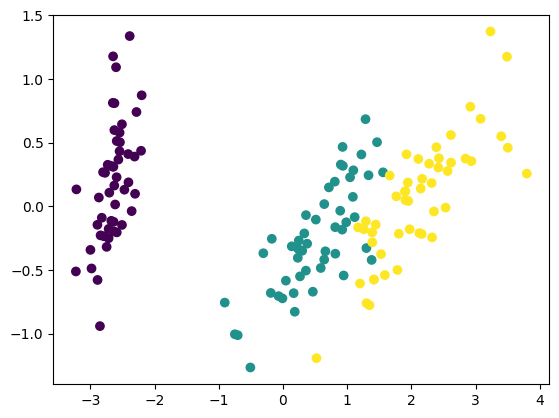

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()

X = data["data"]
Y = data["target"]

pca = PCA(n_components=2, random_state=34)
X_compressed = pca.fit_transform(X)
plt.scatter(X_compressed.T[0], X_compressed.T[1], c=Y)

## Recommender System

SVD can be used in recommender systems.

Suppose we have a table that contains scores given to movies by users. Using this data we would like to group similar movies together for purposes of generating recommendations.

Let users be in rows, and movies in columns and values represent a rating that a user gave to a movie. If a user has not reviewed a movie set their rating to a middle value to reflect the fact that we do not know how the user feels about the movie.

## Recommender System

Now perform PCA on this matrix. We get truncated matrices $U_r M_r V_r^T$. The matrix $V_r^T$ stores information on original matrix's columns, in this case movies.

The columns of $V_r^T$ give an embedding of the movies to $\mathbb{R}^r$. I.e. the column that represents a movie gives the coordinates of the movie in $\mathbb{R}^r$. If we assume that similar people rate similar movies similarly we then get that similar movies should be close to each other in this space.

## Practice Task

Use this idea to generate some recommendations for movies (code for loading the data below).

The goal is to write a script that given a movie name returns similar movies.

Also, truncate the dataset to top 1000 movies in terms of review count. This should give more robust results.

In [5]:
import numpy as np
import pandas as pd

ratings = pd.read_csv('https://raw.githubusercontent.com/jputrius/ml_intro/refs/heads/main/data/movielens/ratings.csv')
movies = pd.read_csv('http://raw.githubusercontent.com/jputrius/ml_intro/refs/heads/main/data/movielens/movies.csv')